In [13]:
import os
import fitz  # PyMuPDF
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Ruta de acceso a la carpeta con los documentos PDF
folder_path = r"C:\Users\villa\OneDrive\Escritorio\TFE\info societarios"

In [6]:
# Función para leer el contenido de un PDF
def read_pdf(file_path):
    try:
        doc = fitz.open(file_path)
        text = ""
        for page_num in range(doc.page_count):
            page = doc.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"Error leyendo {file_path}: {e}")
        return ""

In [9]:
# Preprocesar los textos: tokenización y eliminación de stopwords
stop_words = set(stopwords.words('spanish'))
processed_docs = []
for doc in documents:
    tokens = word_tokenize(doc.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    processed_docs.append(filtered_tokens)

In [7]:
# Cargar y leer todos los documentos PDF en la carpeta
documents = []
file_names = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.pdf'):
        file_path = os.path.join(folder_path, file_name)
        text = read_pdf(file_path)
        if text:  # Añadir solo si se leyó correctamente
            documents.append(text)
            file_names.append(file_name)

Error leyendo C:\Users\villa\OneDrive\Escritorio\TFE\info societarios\119625 WILLIAM RAMIRO ORTÍZ MARTÍNEZ VS. CLINICA HISPANOAMERICANA S.A.S y OTRO 20 05 2021.pdf: cannot open broken document
Error leyendo C:\Users\villa\OneDrive\Escritorio\TFE\info societarios\15701 CAFETERÍAS Y EVENTOS GMH S.A.S. VS. UNIVERSIDAD CATÓLICA DE COLOMBIA 30 01 2020.pdf: cannot open broken document
Error leyendo C:\Users\villa\OneDrive\Escritorio\TFE\info societarios\15741 COMPAÑÍA CELL NET DE OCCIDENTE S.A. VS. COMUNICACIÓN CELULAR S.A. COMCEL S.A. 13 03 2020.pdf: cannot open broken document
Error leyendo C:\Users\villa\OneDrive\Escritorio\TFE\info societarios\4660_INDECON_y_OLANO_INGENIERIA_VS._FIDUCIARIA_BOGOTA_y_ALIANZA_FIDUCIARIA_31_07_17.pdf: cannot open broken document
Error leyendo C:\Users\villa\OneDrive\Escritorio\TFE\info societarios\5023_TRANEXCO_VS._SERVICIOS_POSTALES_NACIONALES_24_01_2018-OCR.pdf: cannot open broken document
Error leyendo C:\Users\villa\OneDrive\Escritorio\TFE\info societari

In [11]:
# Entrenar el modelo Word2Vec
model = Word2Vec(sentences=processed_docs, vector_size=100, window=5, min_count=1, workers=4)


In [14]:
# Obtener los embeddings promediados para cada documento
def get_document_embedding(doc):
    embeddings = [model.wv[word] for word in doc if word in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

document_embeddings = [get_document_embedding(doc) for doc in processed_docs]

In [15]:
# Obtener los embeddings promediados para cada documento
def get_document_embedding(doc):
    embeddings = [model.wv[word] for word in doc if word in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

document_embeddings = [get_document_embedding(doc) for doc in processed_docs]

In [16]:
# Aplicar KMeans para agrupar los documentos
num_clusters = 5  # Puedes ajustar el número de clusters según sea necesario
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(document_embeddings)

C:\Users\villa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\villa\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\villa\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\villa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are 

In [17]:
# Reducir la dimensionalidad para la visualización
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(document_embeddings)

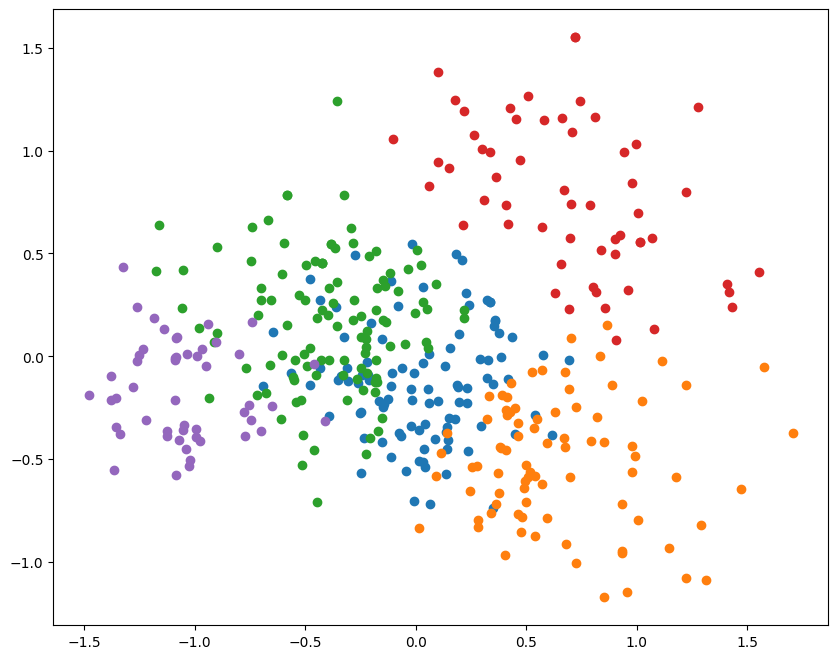

In [18]:
# Visualizar los clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = embeddings_2d[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


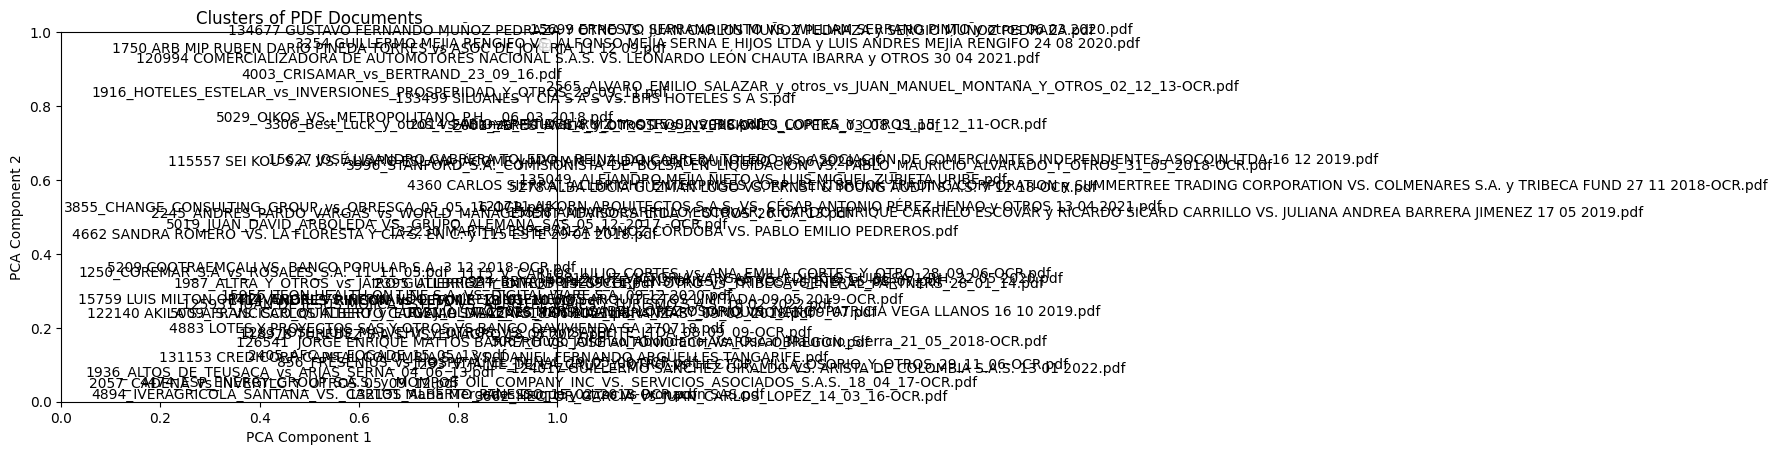

In [19]:
for i, file_name in enumerate(file_names):
    plt.annotate(file_name, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('Clusters of PDF Documents')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()